In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

df = pd.read_csv('average_product_prices_per_country_per_month.csv', encoding = "ISO-8859-1")

Bread
Wheat
Wage (qualified labour)


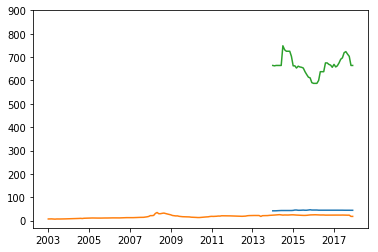

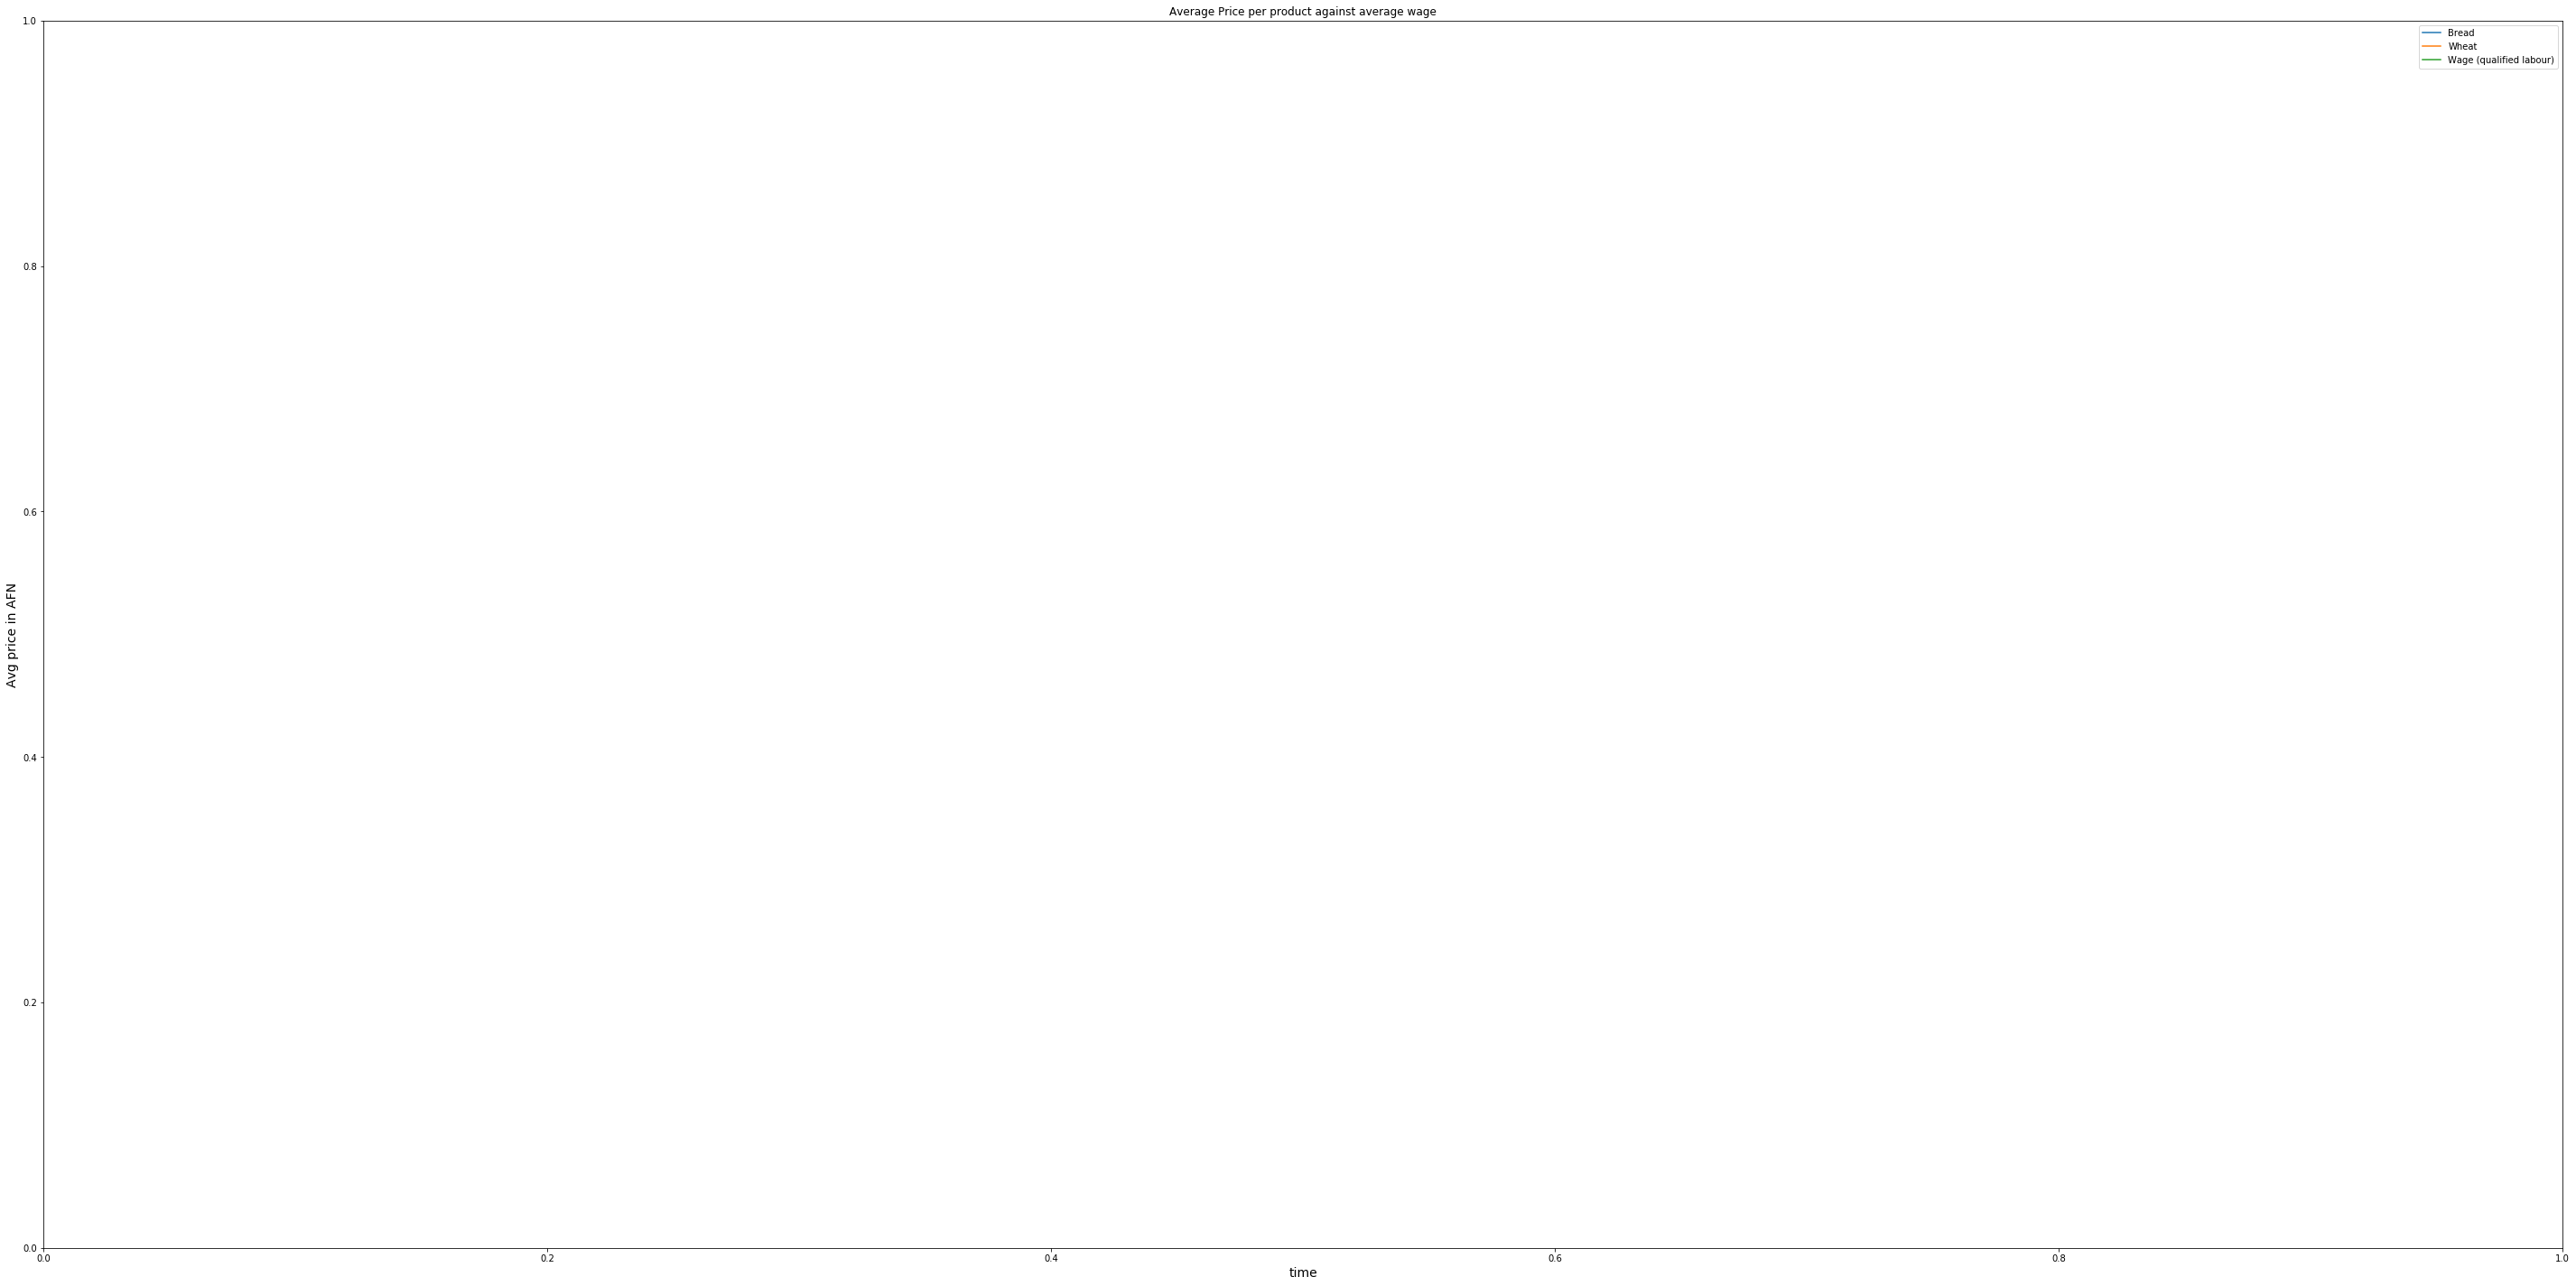

In [37]:
products = ['Bread', 'Wheat', 'Wage (qualified labour)']
lines = []
for product in products:
    print(product)
    df_subset = df[(df['country']=='Afghanistan') & (df['product']==product)]
    avg_prices = list(df_subset['avg_price'])
    years = list(df_subset['year'])
    months = list(df_subset['month'])

    dates = []
    price_sum = []

    for price in avg_prices:
        if price != 'UNKNOWN':
            price_sum.append(float(price))

    avg_price = sum(price_sum) / len(price_sum)
    for i, (month, year) in enumerate(zip(months, years)):
        avg_prices[i] = float(avg_prices[i]) if avg_prices[i] != 'UNKNOWN' else avg_price
        dates.append(dt.datetime(year=year, month=month, day=1))
    line, = plt.plot(dates, avg_prices, label=product)
    lines.append(line)

  
    
plt.yticks(np.arange(0, 1000, 100))
plt.figure(figsize=(50,25))
plt.legend(lines, products) 
plt.title('Average Price per product against average wage')
plt.xlabel('time', fontsize=14)
plt.ylabel('Avg price in AFN', fontsize=14)
plt.show()
